In [3]:
# Importing essential libraries
import numpy as np  #for the mathematical operations
from bs4 import BeautifulSoup #for getting the data from website
import matplotlib.pyplot as plt  #for plotting the graph
from tabulate import tabulate  #for creating tables of the data
import requests  #for connecting to the website
import os  #for the os related function

In [38]:
extract_contents = lambda row : [x.text.replace('\n', '') for x in row]

URL = "https://www.mohfw.gov.in/"

HEADER = ['SNo', 'State', 'Indian-Confirmed', 'Foreign-Confirmed', 'Cured', 'Death']

r = requests.get(URL)
soup = BeautifulSoup(r.content, 'html.parser')
header = extract_contents(soup.tr.find_all('thead'))

heads = []
all_rows = soup.find_all('tr')

for row in all_rows:
    head = extract_contents(row.find_all('td'))
    if head:
        if len(head) == 5:
            head = ['', *head]
            heads.append(head)
        elif len(head) == 6:
            heads.append(head)
        
heads[-1][1] = "Total Cases"

heads.remove(heads[-1])

heads

[['1', 'Andaman and Nicobar Islands', '1', '0', '0', '0'],
 ['2', 'Andhra Pradesh', '11', '0', '1', '0'],
 ['3', 'Bihar', '6', '0', '0', '1'],
 ['4', 'Chandigarh', '7', '0', '0', '0'],
 ['5', 'Chhattisgarh', '6', '0', '0', '0'],
 ['6', 'Delhi', '35', '1', '6', '1'],
 ['7', 'Goa', '3', '0', '0', '0'],
 ['8', 'Gujarat', '42', '1', '0', '3'],
 ['9', 'Haryana', '16', '14', '11', '0'],
 ['10', 'Himachal Pradesh', '3', '0', '0', '1'],
 ['11', 'Jammu and Kashmir', '13', '0', '1', '1'],
 ['12', 'Karnataka', '55', '0', '3', '2'],
 ['13', 'Kerala', '110', '8', '6', '0'],
 ['14', 'Ladakh', '13', '0', '0', '0'],
 ['15', 'Madhya Pradesh', '20', '0', '0', '1'],
 ['16', 'Maharashtra', '121', '3', '1', '3'],
 ['17', 'Manipur', '1', '0', '0', '0'],
 ['18', 'Mizoram', '1', '0', '0', '0'],
 ['19', 'Odisha', '2', '0', '0', '0'],
 ['20', 'Puducherry', '1', '0', '0', '0'],
 ['21', 'Punjab', '33', '0', '0', '1'],
 ['22', 'Rajasthan', '39', '2', '3', '0'],
 ['23', 'Tamil Nadu', '20', '6', '1', '1'],
 ['24', '

In [39]:
table = tabulate(heads, headers=HEADER)
print(table)

  SNo  State                          Indian-Confirmed    Foreign-Confirmed    Cured    Death
-----  ---------------------------  ------------------  -------------------  -------  -------
    1  Andaman and Nicobar Islands                   1                    0        0        0
    2  Andhra Pradesh                               11                    0        1        0
    3  Bihar                                         6                    0        0        1
    4  Chandigarh                                    7                    0        0        0
    5  Chhattisgarh                                  6                    0        0        0
    6  Delhi                                        35                    1        6        1
    7  Goa                                           3                    0        0        0
    8  Gujarat                                      42                    1        0        3
    9  Haryana                                      16      

In [40]:
objects = []
for row in heads:
    objects.append(row[1])
    
y_pos = np.arange(len(objects))

performance = []
for row in heads:
    performance.append(int(row[2]) + int(row[3]))

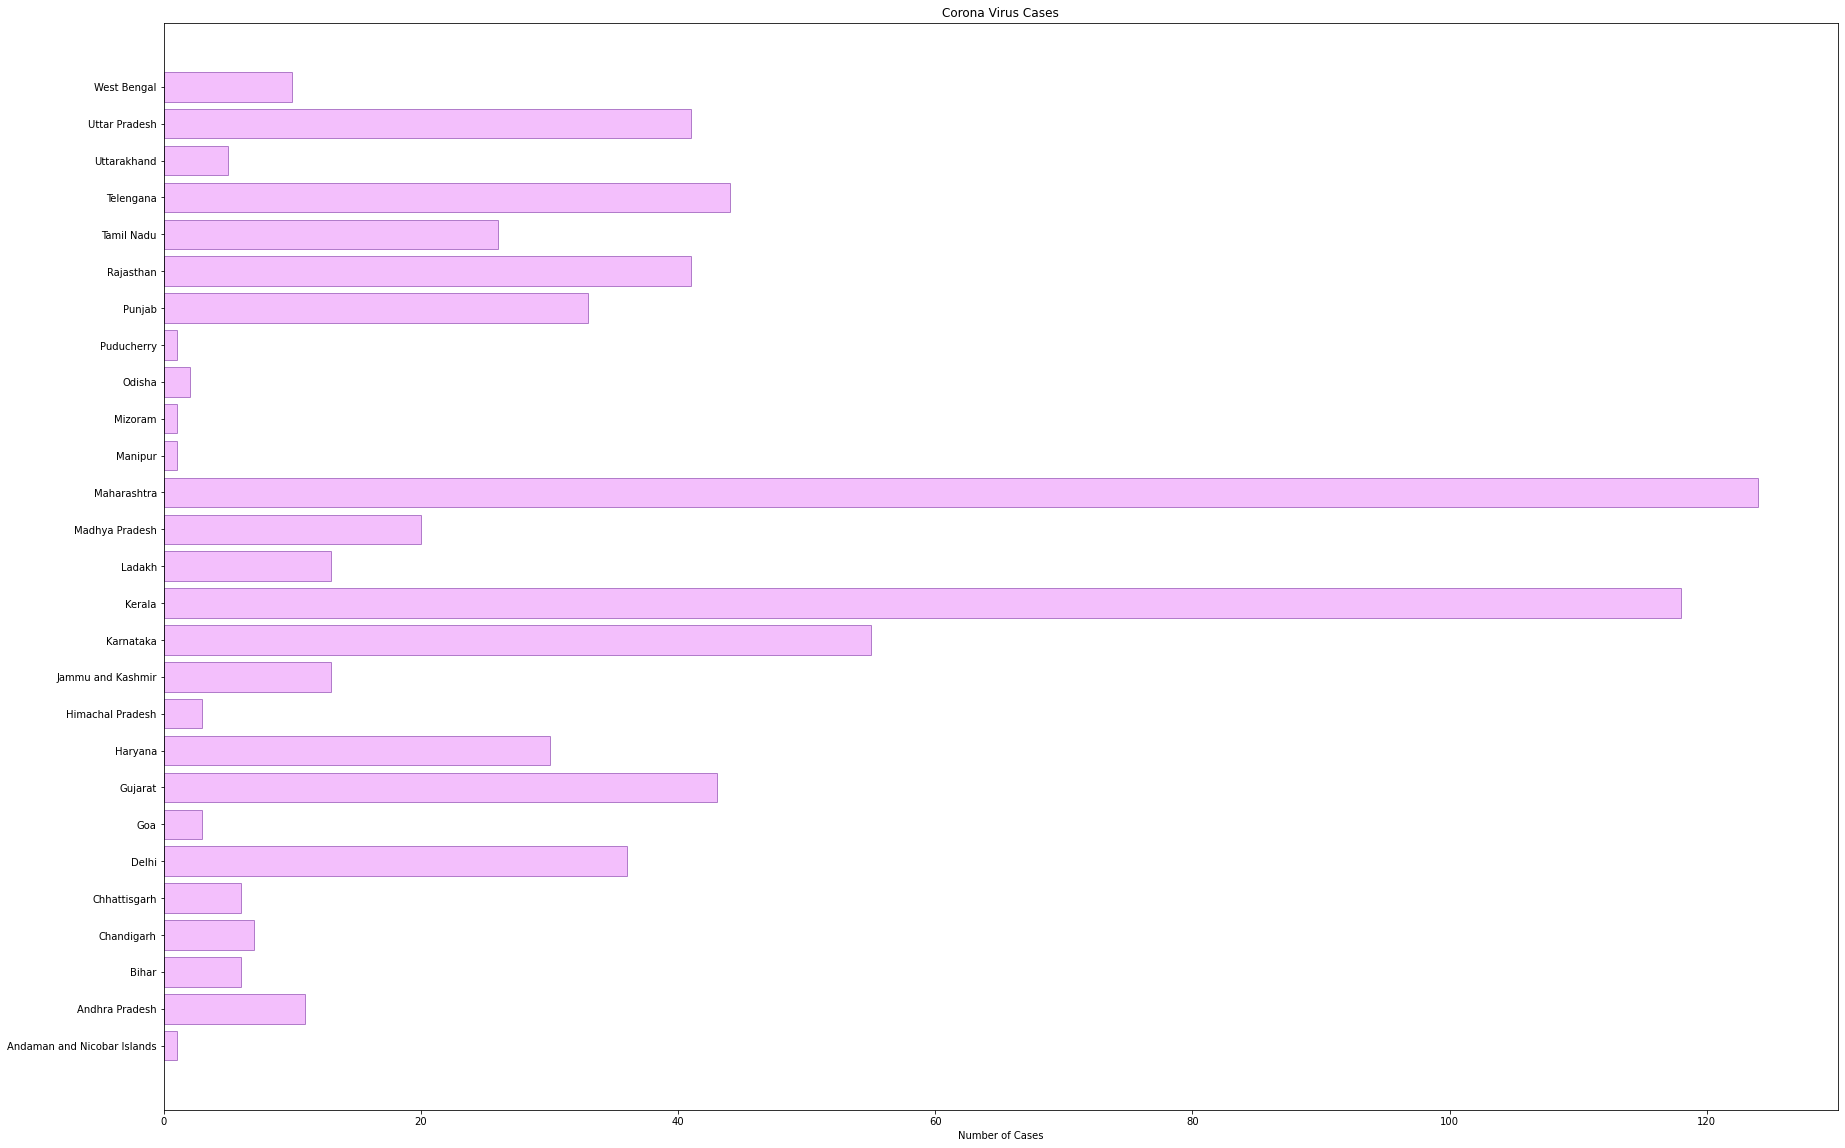

In [55]:
plt.figure(figsize=(30,20))
plt.barh(y_pos, performance, align='center', alpha=0.5, 
         color=(234/256.0, 128/256.0, 252/256.0), 
         edgecolor=(106/256.0, 27/256.0, 154/256.0))
plt.yticks(y_pos, objects) 
#plt.xlim(1,80) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 